In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
FILENAME = './Summer_2015.csv'

In [2]:
def plot_course_num(course, name, number):
    averages = course['Average Grade']
    letters = course.loc[:, 'A+':'W']
    grades = course.loc[:, 'A+':'F']
    num_students = np.sum(grades, axis=1)
    weighted_avg = np.round(np.ma.average(averages, weights=num_students), 2)
    highest = np.max(grades.values)
    letters.T.plot(kind='bar', ylim=(0, int(highest*1.1)+1), legend=False,
                title='{0} {1} Grades'.format(name, number))
    plt.text(8.25, highest*0.95, 'Average GPA: {0:.2f}'.format(weighted_avg), fontsize=12)

In [41]:
# Read, clean, and add column to data
df = pd.read_csv(FILENAME).dropna()
drops = ['CRN', 'Term', 'Sched Type', 'Course Section', 'Primary Instructor']
df = df.drop(drops, 1)
df.ix[:, 'A+':'F'] = df.ix[:, 'A+':'F'].astype(np.int)
df.insert(df.columns.get_loc('A+'), 'Enrollment', df.ix[:, 'A+':'F'].sum(axis=1))

In [42]:
df.head()

,Course Subject,Course Number,Course Title,Enrollment,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Average Grade
0,ACCY,200,Fundamentals of Accounting,138,8,40,16,26,12,16,6,8,6,0,0,0,0,0.0,3.30
1,ACCY,301,Atg Measurement & Disclosure,58,2,6,10,22,14,4,0,0,0,0,0,0,0,0.0,3.36
2,ACCY,301,Atg Measurement & Disclosure,54,2,10,16,4,14,8,0,0,0,0,0,0,0,0.0,3.40
3,ACCY,302,Decision Making for Atg,60,0,4,28,12,10,6,0,0,0,0,0,0,0,0.0,3.41
4,ACCY,302,Decision Making for Atg,54,4,8,16,12,4,2,0,8,0,0,0,0,0,0.0,3.33


In [50]:
by_course = df.set_index(['Course Subject', 'Course Number'])
by_course.ix['MUS'].head()

,Course Title,Enrollment,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Average Grade
Course Number,,,,,,,,,,,,,,,,,
130,Introd to the Art of Music,42,12,10,8,4,4,0,4,0,0,0,0,0,0,0.0,3.62
132,Popular Music Studies,82,2,46,2,4,16,0,0,6,0,0,0,0,6,0.0,3.33
408,Analysis of Musical Form,44,2,0,12,12,12,0,4,0,0,2,0,0,0,0.0,3.18
433,Music Interdisciplinary Curric,30,0,26,2,0,0,0,0,0,0,0,0,0,2,0.0,3.83
437,Popular Music Pedagogy,26,24,0,0,0,0,0,0,0,0,0,0,0,2,0.0,3.80


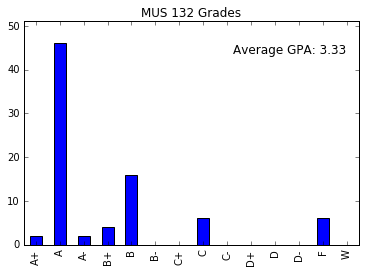

In [49]:
course, number = 'MUS', 132
plot_course_num(by_course.ix[course].ix[[number]], course, number)

In [26]:
enroll = pd.concat((by_course['Enrollment'], by_course['Average Grade']), axis=1)
groups = enroll.groupby(level=[0,1])
avgs = groups.apply(lambda d: np.round_(np.ma.average(d['Average Grade'], weights=d['Enrollment']), 2)
                   ).to_frame('Course GPA')
avgs.insert(0, 'Enrollment', groups.apply(np.sum)['Enrollment'].astype(np.int))

In [38]:
avgs.ix[['LA']]

,,Enrollment,Course GPA
Course Subject,Course Number,,
LA,314,48,2.15


In [34]:
group = avgs.groupby(level=0)
all_avg = group.apply(lambda d: np.round_(np.ma.average(d['Course GPA'], weights=d['Enrollment']), 2)
                 ).to_frame('Major GPA')
all_avg.loc[['GE', 'IE', 'MATH','PHYS', 'TAM']]

,Major GPA
Course Subject,
GE,3.50
IE,3.20
MATH,2.83
PHYS,2.90
TAM,2.94


In [37]:
by_gpa = all_avg.sort_values(by=['Major GPA'])
#bottom = by_gpa.index.values
by_gpa

,Major GPA
Course Subject,
LA,2.15
MATH,2.83
PHYS,2.90
VM,2.92
EALC,2.92
TAM,2.94
ANTH,2.97
CHBE,2.98
ECON,2.99


In [39]:
tot = all_avg.join(avgs)
tot.set_index('Major GPA', append=True, inplace=True)
tot = tot.reorder_levels((0, 2, 1))
tot.ix[bottom[:1]]

,,,Enrollment,Course GPA
Course Subject,Major GPA,Course Number,,
LA,2.15,314,48,2.15
